# NLP_RATINGS_PREDICTION

*Problem Definition :


    -we have to build an application which can predict the rating by seeing the review.

In [1]:
##importing libraries
#data manipulation
import pandas as pd
import numpy as np
import re
import string

##Machine learning and text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from wordcloud import WordCloud

#libraries used for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the csv file
pd.set_option('display.max_rows', None)
dfa=pd.read_csv("NLP_Ratings_csv_merged.csv")

In [3]:
#copying the dataset into a place holder
df=dfa.copy()

In [4]:
df.isnull().sum()

Unnamed: 0    0
title         6
rating        0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0    0
title         0
rating        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115373 entries, 0 to 115378
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  115373 non-null  int64  
 1   title       115373 non-null  object 
 2   rating      115373 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [7]:
df['rating'].value_counts()

5.0    64925
4.0    23601
1.0    11702
3.0     8994
2.0     6151
Name: rating, dtype: int64

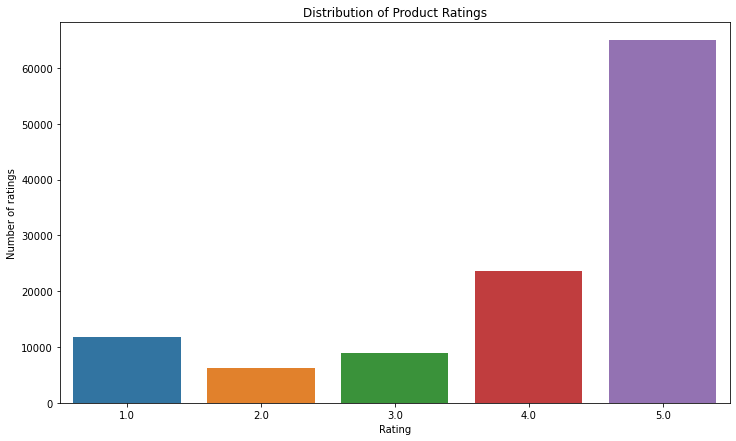

In [13]:
f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['rating'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

In [9]:
df=df.sort_values(by='rating',ascending=False,ignore_index=True)
df.head()

Unnamed: 0                                              title  rating
0           0  Best Value for Money in this Range. Go for it ...     5.0
1       65802                              Mind-blowing purchase     5.0
2       65811                                          Brilliant     5.0
3       65810                                  Terrific purchase     5.0
4       65808                                  Terrific purchase     5.0

In [10]:
df['title'][5005]

'Classy product'

In [11]:
#dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis =1, inplace = True)
df.head()

title  rating
0  Best Value for Money in this Range. Go for it ...     5.0
1                              Mind-blowing purchase     5.0
2                                          Brilliant     5.0
3                                  Terrific purchase     5.0
4                                  Terrific purchase     5.0

# Balancing the Dataset :

In [15]:
rating5 = df[df['rating']==5]
rating4 = df[df['rating']==4]
rating3 = df[df['rating']==3]
rating2 = df[df['rating']==2]
rating1 = df[df['rating']==1]

In [16]:
rating5.info()
rating4.info()
rating3.info()
rating2.info()
rating1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64925 entries, 0 to 64924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   64925 non-null  object 
 1   rating  64925 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23601 entries, 64925 to 88525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   23601 non-null  object 
 1   rating  23601 non-null  float64
dtypes: float64(1), object(1)
memory usage: 553.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8994 entries, 88526 to 97519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   8994 non-null   object 
 1   rating  8994 non-null   float64
dtypes: float64(1), object(1)
memory usage: 210.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 9

In [17]:
dft=pd.concat([rating1[0:6151], rating2[0:6151], rating3[0:6151], rating4[0:6151], rating5[0:6151]])

In [18]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30755 entries, 103671 to 6150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   30755 non-null  object 
 1   rating  30755 non-null  float64
dtypes: float64(1), object(1)
memory usage: 720.8+ KB


In [19]:
dft['rating'].value_counts()

5.0    6151
4.0    6151
3.0    6151
2.0    6151
1.0    6151
Name: rating, dtype: int64

In [20]:
dft.shape

(30755, 2)

# Data-Set Pre-Processing :

In [21]:
dft['title'] = dft['title'].str.lower()#lower case
dft['title'] = dft['title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')#remove email address
dft['title'] = dft['title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'web')#remove webaddress
dft['title'] = dft['title'].str.replace(r'£|\$|₹', 'signs')#remove signs
dft['title'] = dft['title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'ph_number')#remove phonenumber
dft['title'] = dft['title'].str.replace(r'\d+(\.\d+)?', 'number')#remove numbers
dft['title'] = dft['title'].str.replace(r'[^\w\d\s]', ' ')#remove punctuation
dft['title'] = dft['title'].str.replace(r'\s+', ' ')#remove spaces
dft['title'] = dft['title'].str.replace(r'^\s+|\s+?$', '') 

In [22]:
#Removing Stop_Words
stop_words = set(stopwords.words('english') + ['u','ur','im','doin','i','so', 'ü', 'â', 'ur', '4', '2', 'dont', 'doin', 'ure','READ MORE','read'])
dft['title'] = dft['title'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
dft.head(10)

title  rating
103671                                        waste money     1.0
103672                                rcd damaged product     1.0
103673                                        waste money     1.0
103674                                    useless product     1.0
103675                         give audio jack hdmi cable     1.0
103676  brought appario retail private ltd fresh item ...     1.0
103677                                          worthless     1.0
103678                          value money false ratings     1.0
103679                                           horrible     1.0
103680                   working fine first number months     1.0

In [23]:
#Lemmetizing
WL = WordNetLemmatizer()
dft['title'] = dft['title'].apply(lambda x: ' '.join(WL.lemmatize(i) for i in x.split()))
dft.head(10)

title  rating
103671                                        waste money     1.0
103672                                rcd damaged product     1.0
103673                                        waste money     1.0
103674                                    useless product     1.0
103675                         give audio jack hdmi cable     1.0
103676  brought appario retail private ltd fresh item ...     1.0
103677                                          worthless     1.0
103678                           value money false rating     1.0
103679                                           horrible     1.0
103680                    working fine first number month     1.0

In [24]:
dft=dft.sort_values(by='rating',ascending=False,ignore_index=True)
dft.head()

title  rating
0                    wow     5.0
1              excellent     5.0
2  mind blowing purchase     5.0
3      worth every penny     5.0
4  mind blowing purchase     5.0

In [25]:
dft['title'][2693]

'simply awesome'

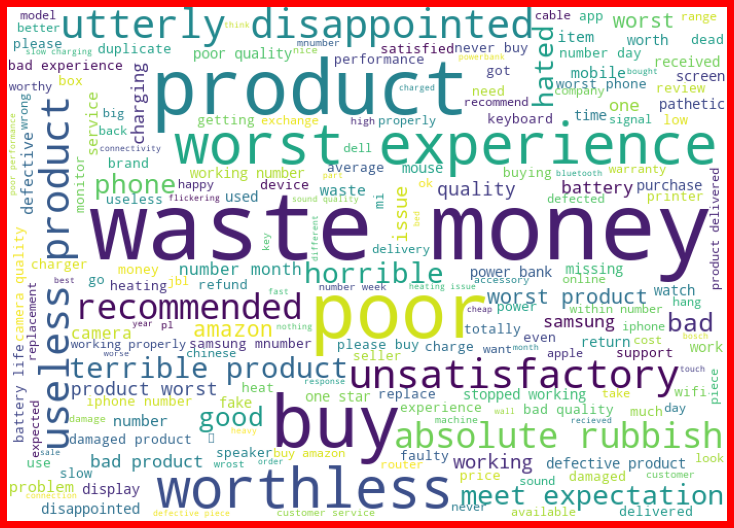

In [26]:
#Getting sense of words in Rating 1
plot = dft['title'][dft['rating']==1.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

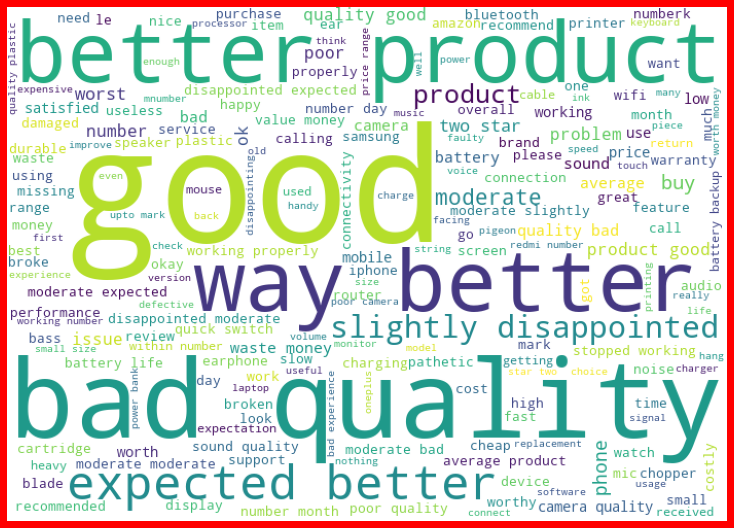

In [27]:
#Getting sense of words in Rating 2
plot = dft['title'][dft['rating']==2.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

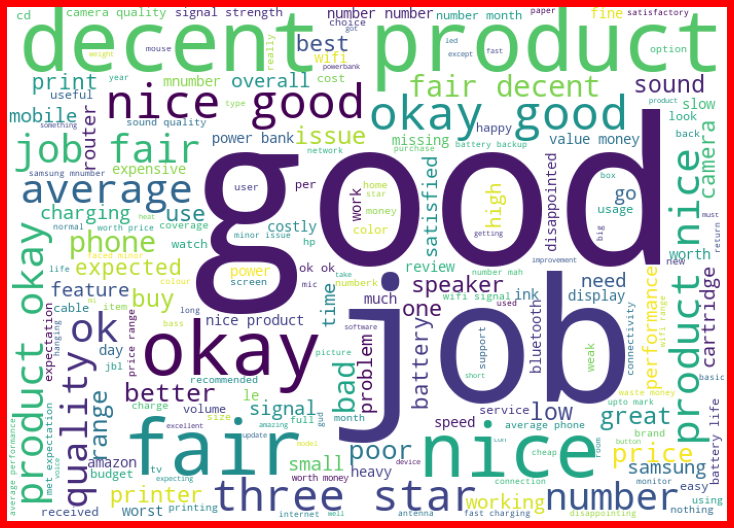

In [28]:
#Getting sense of words in Rating 3
plot = dft['title'][dft['rating']==3.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

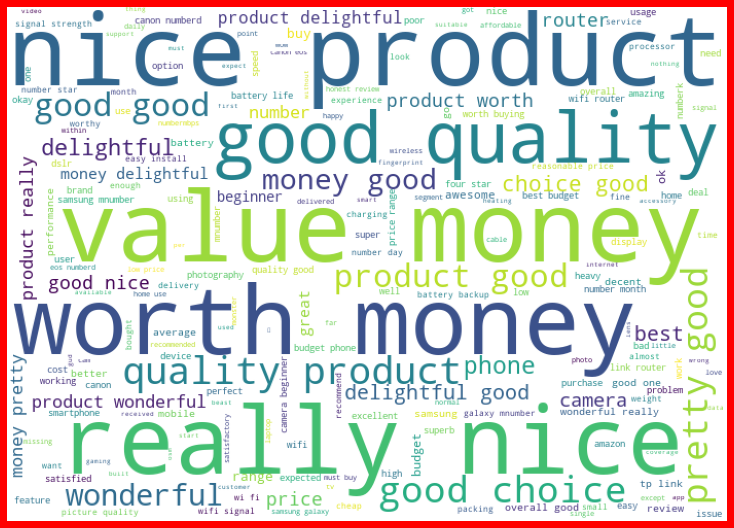

In [29]:
#Getting sense of words in Rating 4
plot = dft['title'][dft['rating']==4.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

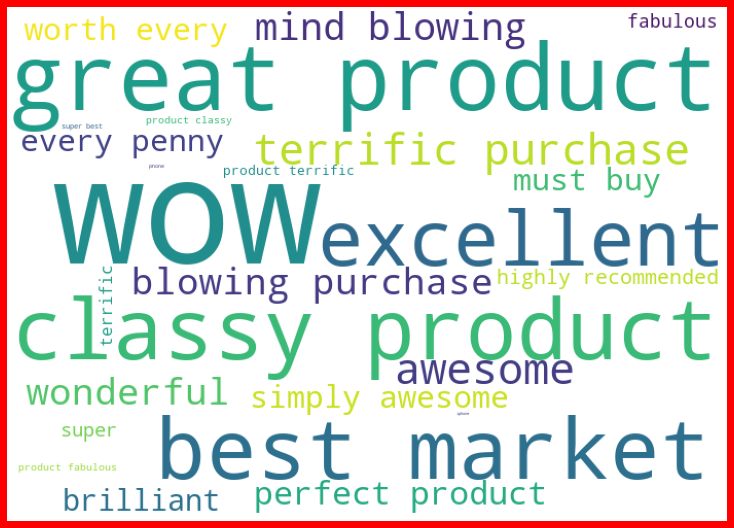

In [30]:
#Getting sense of words in Rating 5
plot = dft['title'][dft['rating']==5.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Feature Extraction

In [31]:
tfidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,5), analyzer = 'char')

In [32]:
x = tfidf.fit_transform(dft['title'])
y = dft['rating']

In [33]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

In [34]:
x.shape,y.shape

((30755, 20000), (30755,))

In [35]:
x_train.shape

(24604, 20000)

In [36]:
y_train.shape

(24604,)

# MODEL BUILIDING :

In [37]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [38]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [39]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [40]:
Model= []
score= []
cvs=[]
for name,model in models:

    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    score.append(AS*100)
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')

KNeighborsClassifier(n_neighbors=6)


classification_report
               precision    recall  f1-score   support

         1.0       0.72      0.71      0.71      1253
         2.0       0.60      0.65      0.62      1263
         3.0       0.68      0.76      0.72      1222
         4.0       0.86      0.72      0.78      1199
         5.0       0.98      0.94      0.96      1214

    accuracy                           0.75      6151
   macro avg       0.77      0.76      0.76      6151
weighted avg       0.76      0.75      0.76      6151



DecisionTreeClassifier(random_state=6)


classification_report
               precision    recall  f1-score   support

         1.0       0.69      0.71      0.70      1253
         2.0       0.63      0.60      0.61      1263
         3.0       0.69      0.77      0.73      1222
         4.0       0.79      0.75      0.77      1199
         5.0       0.98      0.94      0.96      1214

    accuracy                           0.75      6151
   m

In [41]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

Model  Accuracy_score  Cross_val_score
0        KNeighborsClassifier       75.483661        74.238386
1      DecisionTreeClassifier       75.288571        74.853027
2      RandomForestClassifier       77.792229        76.852700
3          AdaBoostClassifier       64.916274        63.693809
4               MultinomialNB       75.581206        74.602510
5  GradientBoostingClassifier       76.898065        75.903227
6           BaggingClassifier       76.735490        75.958532
7        ExtraTreesClassifier       78.052349        77.054287

# HYPERPARAMETER TUNING

In [42]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=96)   
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     
print(rfc.best_score_)      

{'n_estimators': 100}
0.7665422743451303


In [43]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=96,n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  76.84929279791903
Cross validation score:  75.45442213549543
Classification report: 

              precision    recall  f1-score   support

         1.0       0.72      0.75      0.74      1253
         2.0       0.61      0.65      0.63      1263
         3.0       0.74      0.74      0.74      1222
         4.0       0.83      0.76      0.80      1199
         5.0       0.98      0.94      0.96      1214

    accuracy                           0.77      6151
   macro avg       0.78      0.77      0.77      6151
weighted avg       0.77      0.77      0.77      6151

Confusion matrix: 

[[ 942  249   40   22    0]
 [ 238  823  155   44    3]
 [  81  171  909   56    5]
 [  42  101  127  913   16]
 [   2    9    2   61 1140]]


# Final Model :

In [44]:
rating_prediciton=rfc.predict(x)
Ratings_Prediction = pd.DataFrame({'Prediciton' : rating_prediciton})
Ratings_Prediction

Prediciton
0             5.0
1             5.0
2             5.0
3             5.0
4             5.0
5             5.0
6             5.0
7             5.0
8             5.0
9             5.0
10            5.0
11            5.0
12            5.0
13            5.0
14            5.0
15            5.0
16            5.0
17            5.0
18            5.0
19            4.0
20            5.0
21            5.0
22            5.0
23            5.0
24            5.0
25            4.0
26            5.0
27            5.0
28            5.0
29            5.0
30            5.0
31            5.0
32            5.0
33            5.0
34            5.0
35            5.0
36            5.0
37            4.0
38            5.0
39            5.0
40            5.0
41            5.0
42            5.0
43            5.0
44            5.0
45            5.0
46            5.0
47            5.0
48            5.0
49            5.0
50            4.0
51            5.0
52            5.0
53            5.0
54            5.0
55            5.0
56            5.0
57            5.0
58            5.0
59            5.0
60            5.0
61            5.0
62            5.0
63            5.0
64            5.0
65            5.0
66            5.0
67            5.0
68            5.0
69            5.0
70            5.0
71            5.0
72            5.0
73            4.0
74            5.0
75            5.0
76            5.0
77            5.0
78            5.0
79            5.0
80            5.0
81            5.0
82            5.0
83            5.0
84            5.0
85            5.0
86            5.0
87            5.0
88            5.0
89            5.0
90            4.0
91            5.0
92            5.0
93            5.0
94            5.0
95            5.0
96            4.0
97            5.0
98            5.0
99            5.0
100           5.0
101           4.0
102           5.0
103           5.0
104           5.0
105           5.0
106           5.0
107           5.0
108           4.0
109           5.0
110           5.0
111           5.0
112           5.0
113           4.0
114           5.0
115           5.0
116           5.0
117           5.0
118           5.0
119           5.0
120           5.0
121           5.0
122           5.0
123           5.0
124           5.0
125           5.0
126           5.0
127           5.0
128           5.0
129           4.0
130           5.0
131           5.0
132           5.0
133           5.0
134           5.0
135           5.0
136           4.0
137           5.0
138           5.0
139           5.0
140           5.0
141           5.0
142           5.0
143           5.0
144           5.0
145           4.0
146           5.0
147           5.0
148           5.0
149           5.0
150           5.0
151           5.0
152           5.0
153           5.0
154           5.0
155           5.0
156           5.0
157           5.0
158           5.0
159           5.0
160           5.0
161           5.0
162           5.0
163           5.0
164           5.0
165           5.0
166           5.0
167           5.0
168           5.0
169           5.0
170           5.0
171           5.0
172           5.0
173           5.0
174           5.0
175           5.0
176           5.0
177           5.0
178           5.0
179           4.0
180           5.0
181           5.0
182           5.0
183           4.0
184           5.0
185           5.0
186           5.0
187           5.0
188           4.0
189           5.0
190           4.0
191           5.0
192           5.0
193           5.0
194           5.0
195           5.0
196           5.0
197           5.0
198           5.0
199           5.0
200           5.0
201           5.0
202           5.0
203           5.0
204           5.0
205           5.0
206           5.0
207           5.0
208           5.0
209           5.0
210           4.0
211           5.0
212           5.0
213           5.0
214           5.0
215           5.0
216           5.0
217           5.0
218           5.0
219           5.0
220           5.0
221        

# Saving the Model

In [45]:
#Saving the model
import pickle
filename='NLP_Ratings_Prediction.pkl'   
pickle.dump(rfc,open(filename,'wb'))

# CONCLUSION:

# Thus we have predicted ratings with help of the Machine Learning Model. The Machine Learning Model that has been selected is Random forest Classifier because of its good accuracy score and cross value score. 


# END